In [1]:
import h5py
import astropy.units as u
from galpy.util import bovy_plot, bovy_coords
import pandas
from scipy.stats import binned_statistic_2d

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import all the different slices of the simulation.

In [2]:
gal0= h5py.File('latte/lsr-1-rslice-0.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal1= h5py.File('latte/lsr-1-rslice-1.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal2= h5py.File('latte/lsr-1-rslice-2.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal3= h5py.File('latte/lsr-1-rslice-3.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal4= h5py.File('latte/lsr-1-rslice-4.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal5= h5py.File('latte/lsr-1-rslice-5.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal6= h5py.File('latte/lsr-1-rslice-6.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal7= h5py.File('latte/lsr-1-rslice-7.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal8= h5py.File('latte/lsr-1-rslice-8.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal9= h5py.File('latte/lsr-1-rslice-9.m12f-res7100-md-sliced-gcat-dr2.hdf5','r')
gal=[gal0,gal1,gal2,gal3,gal4,gal5,gal6,gal7,gal8,gal9]

Next, convert all the coordinates to Sun-like coordinate system.

In [4]:
ra= gal0['ra_true'].value
dec= gal0['dec_true'].value
d= 1./gal0['parallax_true'].value # True distances from the simulation

lb= bovy_coords.radec_to_lb(ra,dec,degree=True,epoch=None)
XYZ= bovy_coords.lbd_to_XYZ(lb[:,0],lb[:,1],d,degree=True)

# Look at Chemical Bimodality in the Simulation

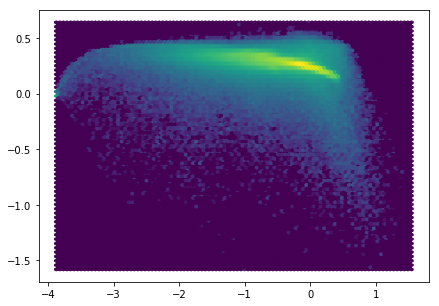

In [10]:
fe=[]; alpha=[]
for g in gal:
    fe= append(fe,g['feh'].value)
    alpha= append(alpha,g['alpha'].value)

figsize(7,5)
hexbin(fe,alpha,bins='log')

savefig('plots/chem_bimodality.pdf')

# Look at different abundances at different heights

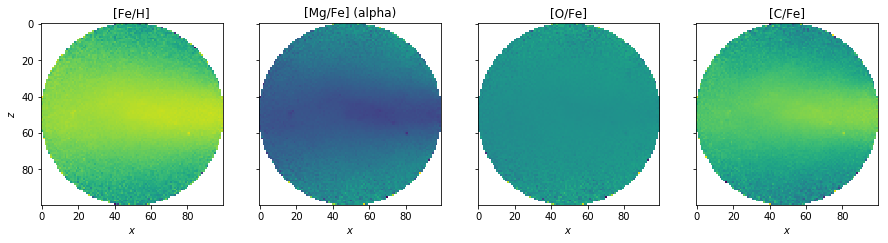

In [11]:
Fe= binned_statistic_2d(XYZ[:,0],XYZ[:,2],gal0['feh'].value,bins=100)
alpha= binned_statistic_2d(XYZ[:,0],XYZ[:,2],gal0['alpha'].value,bins=100)
Oxy= binned_statistic_2d(XYZ[:,0],XYZ[:,2],gal0['oxygen'].value,bins=100)
C= binned_statistic_2d(XYZ[:,0],XYZ[:,2],gal0['carbon'].value,bins=100)

figsize(15,5)

fig,(ax1,ax2,ax3,ax4)= subplots(1,4,sharey=True)
ax1.imshow(Fe[0].T)
ax1.set_xlabel('$x$')
ax1.set_ylabel('$z$')
ax2.set_xlabel('$x$')
ax3.set_xlabel('$x$')
ax4.set_xlabel('$x$')
ax2.imshow(alpha[0].T)
ax3.imshow(Oxy[0].T-Fe[0].T)
ax4.imshow(C[0].T-Fe[0].T)
ax1.title.set_text('[Fe/H]')
ax2.title.set_text('[Mg/Fe] (alpha)')
ax3.title.set_text('[O/Fe]')
ax4.title.set_text('[C/Fe]')

savefig('plots/diff_abundances-3kpc.pdf')